<a href="https://colab.research.google.com/github/rrevuru/data-analysis/blob/master/XGBoost_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import display
import xgboost as xgb
import graphviz
from xgboost import XGBClassifier
from xgboost import plot_tree
import pydotplus
import pydot
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
churn = pd.read_csv('./churn.txt')

In [5]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [6]:
churn_categorical = churn.select_dtypes(include=['object'])

In [7]:
churn_numeric = churn.select_dtypes(exclude=['object'])

In [8]:
churn_numeric.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


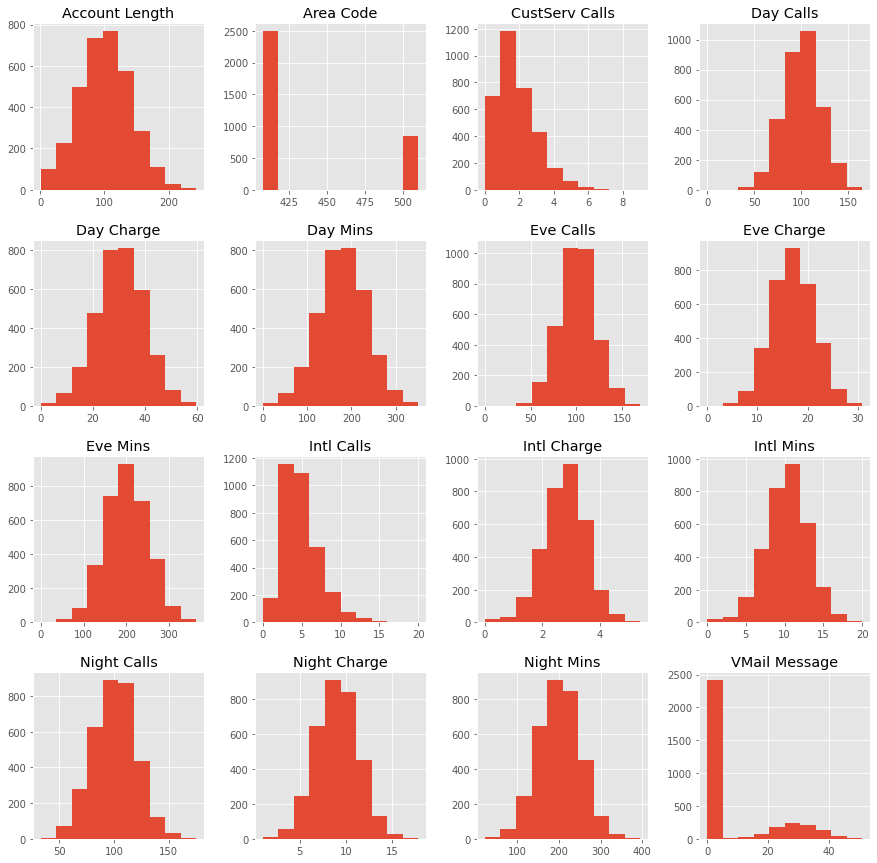

In [9]:
hist01 = churn_numeric.hist(bins=10, figsize=(15,15))

In [10]:
for column in churn_categorical:
    display(pd.crosstab(index=churn_categorical[column], columns= '%observations', normalize='columns'))

col_0,%observations
State,
AK,0.015602
AL,0.024002
AR,0.016502
AZ,0.019202
CA,0.010201
CO,0.019802
CT,0.022202
DC,0.016202
DE,0.018302


col_0,%observations
Phone,
327-1058,0.0003
327-1319,0.0003
327-3053,0.0003
327-3587,0.0003
327-3850,0.0003
...,...
422-7728,0.0003
422-8268,0.0003
422-8333,0.0003


col_0,%observations
Int'l Plan,
no,0.90309
yes,0.09691


col_0,%observations
VMail Plan,
no,0.723372
yes,0.276628


col_0,%observations
Churn?,
False.,0.855086
True.,0.144914


In [11]:
churn = churn.drop('Phone', axis=1)

In [12]:
print(churn['Area Code'].dtype)

int64


In [13]:
churn['Area Code'] = churn['Area Code'].astype(object)

In [14]:
print(churn['Area Code'].dtype)

object


Churn?,False.,True.
State,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


Churn?,False.,True.
Area Code,,
408,0.251228,0.252588
415,0.497895,0.488613
510,0.250877,0.258799


Churn?,False.,True.
Int'l Plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


Churn?,False.,True.
VMail Plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


Account Length


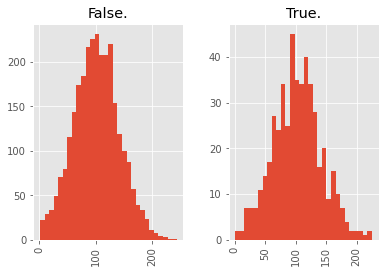

VMail Message


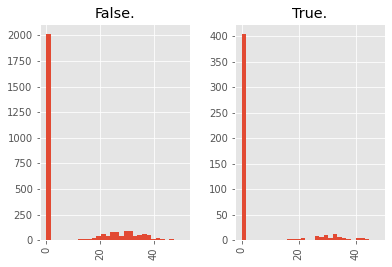

Day Mins


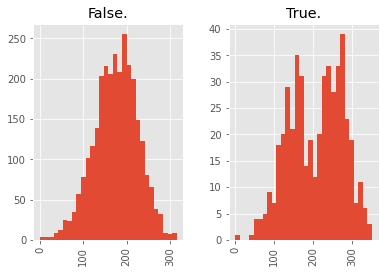

Day Calls


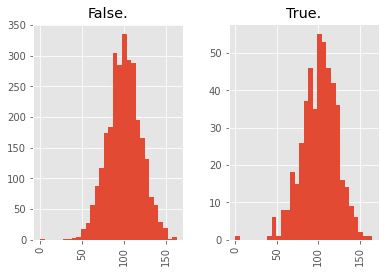

Day Charge


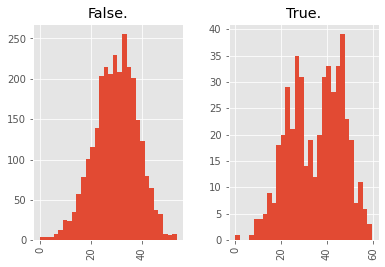

Eve Mins


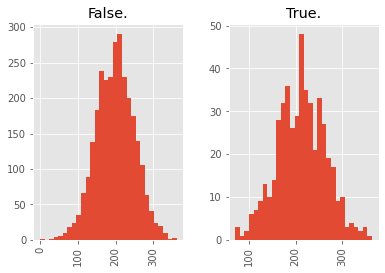

Eve Calls


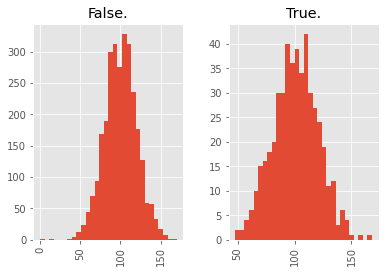

Eve Charge


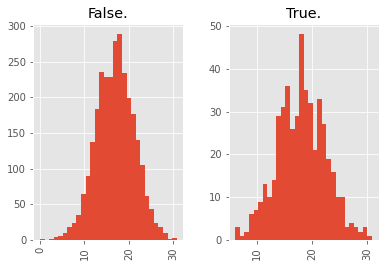

Night Mins


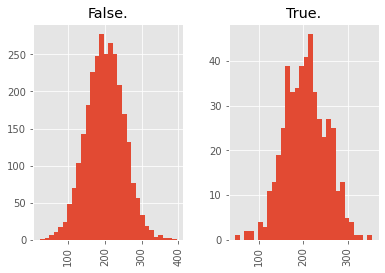

Night Calls


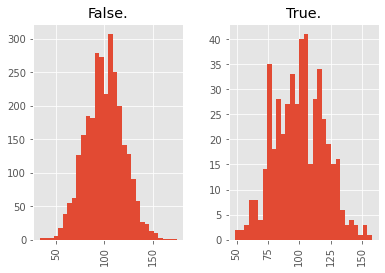

Night Charge


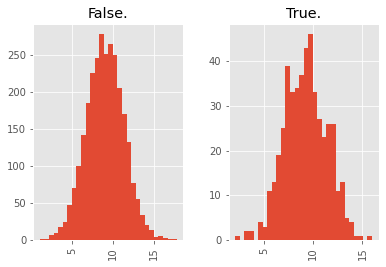

Intl Mins


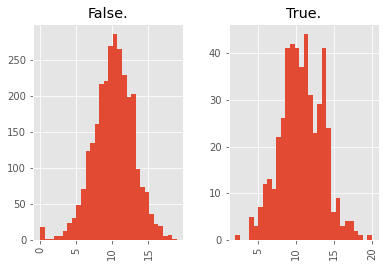

Intl Calls


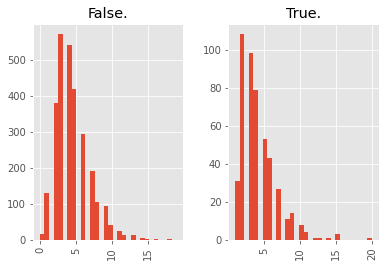

Intl Charge


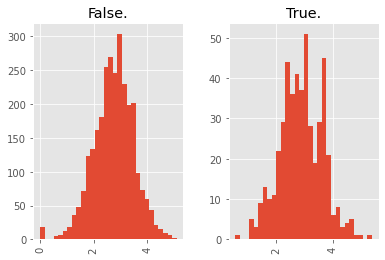

CustServ Calls


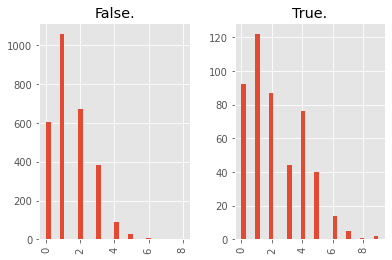

In [15]:
for column in churn.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
        display(pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns'))

        
for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

In [16]:
churn = churn.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1)

In [17]:
model_data = pd.get_dummies(churn)

In [18]:
model_data.shape

(3333, 71)

In [19]:
model_data = pd.concat([model_data['Churn?_True.'], model_data.drop(['Churn?_False.', 'Churn?_True.'],axis=1)], axis=1)

In [20]:
train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])

In [21]:
train_data.to_csv('train.csv')

In [22]:
train_df = pd.read_csv('./train.csv')

In [23]:
validation_data.to_csv('validation.csv')

In [24]:
validation_df = pd.read_csv('./validation.csv')

In [25]:
num_round = 10

In [26]:
param = {'max_depth':3, 'eta': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}

In [27]:
dtrain = xgb.DMatrix('train.csv?format=csv&label_column=1')

[15:28:21] 2334x70 matrix with 163380 entries loaded from train.csv?format=csv&label_column=1


In [28]:
dvalid = xgb.DMatrix('validation.csv?format=csv&label_column=1')

[15:28:31] 667x70 matrix with 46690 entries loaded from validation.csv?format=csv&label_column=1


In [29]:
test_data.to_csv('test.csv')

In [30]:
test_df = pd.read_csv('./test.csv')

In [31]:
dtest = dtest = xgb.DMatrix('test.csv?format=csv&label_column=1')

[15:29:15] 335x70 matrix with 23450 entries loaded from test.csv?format=csv&label_column=1


In [32]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

In [33]:
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.791782	train-auc:0.848785
[1]	eval-auc:0.855386	train-auc:0.909337
[2]	eval-auc:0.870793	train-auc:0.926645
[3]	eval-auc:0.874115	train-auc:0.936856
[4]	eval-auc:0.882716	train-auc:0.951634
[5]	eval-auc:0.87857	train-auc:0.955284
[6]	eval-auc:0.885923	train-auc:0.957537
[7]	eval-auc:0.885025	train-auc:0.959766
[8]	eval-auc:0.872327	train-auc:0.967652
[9]	eval-auc:0.86451	train-auc:0.967714


In [34]:
bst.save_model('0001.model')

In [35]:
bst.dump_model('dump.raw.txt')

In [36]:
ypred = bst.predict(dtest)

In [37]:
print(ypred)

[0.03017637 0.00979576 0.00385541 0.00691016 0.29032022 0.00691016
 0.011225   0.45164788 0.00979576 0.06096351 0.00446468 0.04834396
 0.01994255 0.00385541 0.04882845 0.0158836  0.00580743 0.0952007
 0.02609231 0.36871427 0.04877605 0.02311784 0.61140335 0.01977573
 0.0158836  0.011225   0.01101333 0.00691016 0.99941766 0.0158836
 0.02262757 0.01399165 0.01035381 0.01059169 0.00385541 0.01165892
 0.5947194  0.0158836  0.0051297  0.03510007 0.04470418 0.01530986
 0.10870663 0.01059169 0.00716025 0.00979576 0.9179888  0.01056115
 0.02262757 0.07894392 0.01365522 0.0290805  0.0158836  0.0245402
 0.02262757 0.4159592  0.00651868 0.00627485 0.22809084 0.08696859
 0.05679083 0.12132574 0.00758099 0.07055785 0.02672626 0.02311784
 0.05532948 0.01230951 0.00385541 0.01078372 0.00781594 0.00979576
 0.19783723 0.0234918  0.01011122 0.0952007  0.8426346  0.46594793
 0.03087211 0.00781594 0.011225   0.04550414 0.01056115 0.01317891
 0.011225   0.06705781 0.90246516 0.04806277 0.00385541 0.0188826

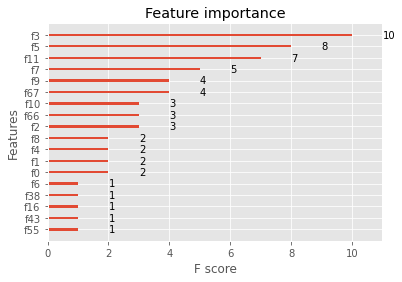

In [38]:
xgb.plot_importance(bst)

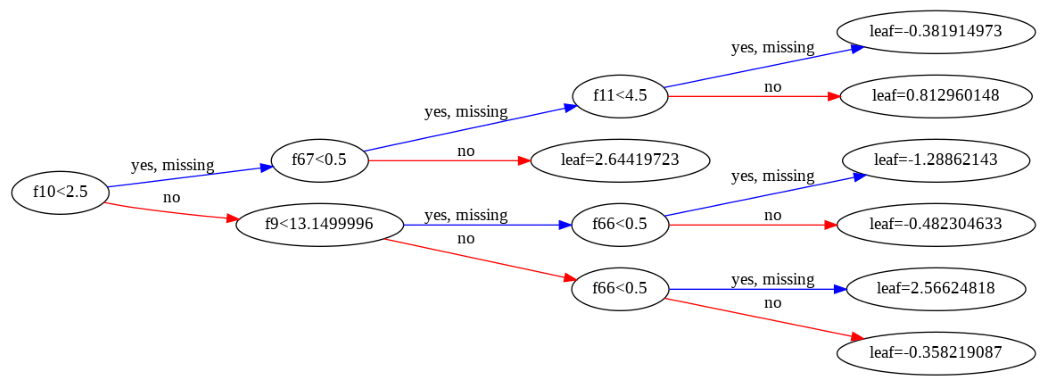

In [42]:
xgb.plot_tree(bst,rankdir='LR',num_trees=2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [46]:
xgb.to_graphviz(bst,fmap='Day Mins',num_trees=1)

ValueError: ignored